<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных-с-датами" data-toc-modified-id="Предобработка-данных-с-датами-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных с датами</a></span></li><li><span><a href="#Удаление-и-добавление-столбцов" data-toc-modified-id="Удаление-и-добавление-столбцов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление и добавление столбцов</a></span></li><li><span><a href="#Проверка-наличия-пропусков-и-дубликатов" data-toc-modified-id="Проверка-наличия-пропусков-и-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка наличия пропусков и дубликатов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Длительность-звонков" data-toc-modified-id="Длительность-звонков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Длительность звонков</a></span></li><li><span><a href="#Пользователи-в-разрезе-тарифов-и-времени" data-toc-modified-id="Пользователи-в-разрезе-тарифов-и-времени-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пользователи в разрезе тарифов и времени</a></span></li><li><span><a href="#Расторжение-договора" data-toc-modified-id="Расторжение-договора-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расторжение договора</a></span></li><li><span><a href="#Активность-пользователей-по-месяцам" data-toc-modified-id="Активность-пользователей-по-месяцам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Активность пользователей по месяцам</a></span></li><li><span><a href="#Расчет-выручки-по-тарифам" data-toc-modified-id="Расчет-выручки-по-тарифам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Расчет выручки по тарифам</a></span></li></ul></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

# Анализ мобильных тарифов

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования**: на небольшой выборке клиентов предварительно проанализировать поведение клиентов мобильного оператора и сделать вывод какой мобильный тариф является более популярным и выгодным для компании.


## Обзор данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# Откроем файл со звонками и сохраним датафрейм в переменную calls
calls = pd.read_csv('calls.csv')
sessions = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
data = [calls, sessions, messages, tariffs, users]

for i in data:
    display(i.head(5))
    print(i.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


Датасет **calls** содержит данные о произведенных звонках:
- id - уникальный номер звонка
- call_date - дата звонка в формате ГГГГ_ММ_ДД
- duration - продолжительность звонка в минутах 
- user_id - уникальный номер пользователя

Датасет **sessions** содержит данные об использовании интернета:
- id - уникальный номер сессии
- mb_used - сколько мегабайтов использовано
- session_date - дата сессии в формате ГГГГ_ММ_ДД
- user_id - уникальный номер пользователя

Датасет **messages** содержит данные о использовании сообщений:
- id - уникальный номер сообщения
- message_date - дата отправки сообщения в формате ГГГГ_ММ_ДД
- user_id - уникальный номер пользователя

Датасет **tariffs** содержит данные о тарифах (ultra / smart):

Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
- Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
- Сообщение — 3 рубля.
- 1 Гб интернет-трафика — 200 рублей.

Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 
- Минута разговора — 1 рубль;
- Сообщение — 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.


Датасет **users** содержит данные о пользователях:
- user_id - уникальный номер пользователя
- age - возраст
- churn_date - дата повторного подключения	
- city - город
- first_name - имя
- last_name	- фамилия
- reg_date - дата регистрации
- tariff - наименование тарифа (ultra / smart)

## Предобработка данных

### Предобработка данных с датами

В датасетах есть столбцы с данными о дате, но имеющие тип данных object, их следует заменить на datetime.

In [4]:
# Заменяем типы данных столбцов с датами на формат даты
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
sessions['session_date'] = pd.to_datetime(sessions['session_date'])

In [5]:
# Проверим корректность временного отрезка на соответствие условию
dates = [users['reg_date'], users['churn_date'],
         calls['call_date'], messages['message_date'], sessions['session_date']]
for i in dates:
    print(i.min(), i.max())

2018-01-01 00:00:00 2018-12-31 00:00:00
2018-08-17 00:00:00 2018-12-30 00:00:00
2018-01-01 00:00:00 2018-12-31 00:00:00
2018-01-02 00:00:00 2018-12-31 00:00:00
2018-01-01 00:00:00 2018-12-31 00:00:00


Мы заменили тип данных с датами на datetime, это понадобится для дальнейшего анализа по месяцам. Минимальная и максимальная даты соответсвуют условию - мы имеем данные за 2018 год. Однако данные об оттоке клиентов (churn_date) есть только с августа по декабрь, возможно это неполная информация.

### Удаление и добавление столбцов

In [6]:
# Удалим столбец Unnamed: 0 из датафрейма sessions
sessions = sessions.drop(['Unnamed: 0'], axis=1)

In [7]:
# Добавим столбец с номером месяца в датасет calls, messages, sessions
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month

### Проверка наличия пропусков и дубликатов

При первичном обзоре данных пропуски не были замечены - во всех столбцах, кроме churn_date в users, заполнение 100%. Но нужно проверить внутреннее содержание, чтобы убедиться, что нет значений,заменяющих NaN (например, знак "-", слова "нет"/"пусто"). Также нужно проверить наличие явных и неявных дубликатов.

In [8]:
# Посчитаем количество явных дубликатов
for i in data:
    print(i.duplicated().sum())

0
0
0
0
0


In [9]:
# Проверим наличие значений, заменяющих NaN, и неявных дубликатов в нечисловых данных
print(sorted(users['city'].unique()))
print(sorted(users['first_name'].unique()))
print(sorted(users['last_name'].unique()))

['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород', 'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород', 'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск', 'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск', 'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск', 'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец', 'Чита', 'Якутск', 'Ярославль']
['Авксентий', 'Агата', 'Агафья', 'Агнесса', 'Адам', 'Аким', 'Аксён', 'Алан',

Дубликатов и заменяющих пустоты значений не обнаружено. Данные чистые.

## Исследовательский анализ данных

### Длительность звонков

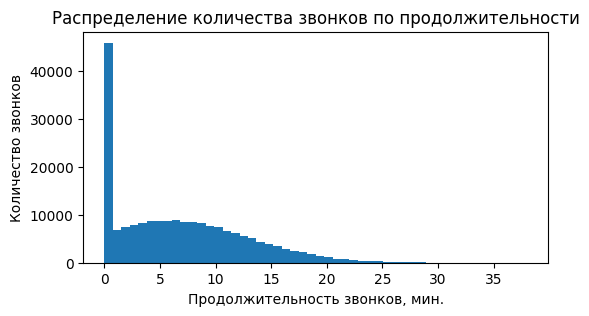

In [10]:
# Выведем гистограмму для столбца с продолжительностью звонков
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(calls['duration'], bins = 50)
ax.set_title('Распределение количества звонков по продолжительности')
ax.set_xlabel('Продолжительность звонков, мин.')
ax.set_ylabel('Количество звонков')
plt.show()

In [11]:
print('Доля звонков с нулевой длительностью:',
      round((calls[calls['duration']==0.00]['duration'].count()/calls['duration'].count()),3))

Доля звонков с нулевой длительностью: 0.196


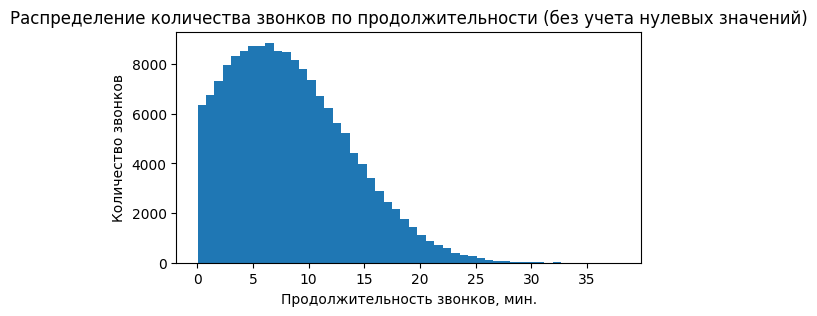

In [12]:
# Выведем гистограмму для столбца с продолжительностью звонков без нулевых значений
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(calls[calls['duration']>0]['duration'], bins = 50)
ax.set_title('Распределение количества звонков по продолжительности (без учета нулевых значений)')
ax.set_xlabel('Продолжительность звонков, мин.')
ax.set_ylabel('Количество звонков')
plt.show()

In [13]:
print('Медианная длительность звонков без учета нулевых значений', calls[calls['duration']>0]['duration'].median())

Медианная длительность звонков без учета нулевых значений 7.74


Длительность звонков распределена неравномерно - большое количество звонков сконцентрировано около значения 0. **Доля звонков с нулевой длительностью составляет 19.6%** от всего датасета. Вероятно это звонки, которые были сброшены или не приняты. 
При взгляде на распределение без нулевых значений пик гистограммы приходится на длительность от 5-10 минут, **медианная длительность действительных звонков равна 7.74 минуты**.

### Пользователи в разрезе тарифов и времени

Изучим сколько пользователей имеется в каждом тарифе.

In [14]:
users.groupby('tariff')['user_id'].nunique()

tariff
smart    351
ultra    149
Name: user_id, dtype: int64

Тариф Смарт пользуется популярностью более чем в два раза чаще (351 чел), чем тариф Ультра (149 чел). Возможно  это связано со стоимостью - тариф Смарт всего всего 550 рублей, когда как тариф Ультра стоит 1950 рублей.

### Расторжение договора

В датасете с информацией о пользователям имеется параметр возврата (churn_rate), по которому мы можем посотреть сколько пользователей расторгли договор с компанией.

In [15]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

In [16]:
lost_users = users.groupby(['churn_date', 'tariff'])['user_id'].count().reset_index()
lost_users = lost_users.sort_values(by='churn_date', ascending=True)
lost_users['churn_date'] = pd.to_datetime(lost_users['churn_date'])
lost_users['month'] = lost_users['churn_date'].dt.month
lost_users = lost_users.groupby(['month', 'tariff'])['user_id'].sum().reset_index()
lost_users.head(10)

,month,tariff,user_id
0,8,smart,1
1,8,ultra,1
2,9,smart,1
3,9,ultra,2
4,10,smart,5
5,10,ultra,4
6,11,smart,6
7,11,ultra,2
8,12,smart,10
9,12,ultra,6


Text(0, 0.5, 'Количество ушедших пользователей')

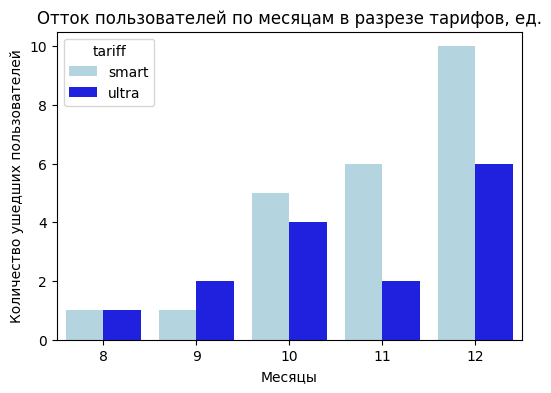

In [17]:
# Визуализируем отток пользователей по месяцам в разрезе тарифов
plt.figure(figsize=(6,4))
plt.title('Отток пользователей по месяцам в разрезе тарифов, ед.')
sns.barplot(data=lost_users, x='month', y='user_id', hue='tariff', palette=['lightblue', 'blue'])
plt.xlabel('Месяцы')
plt.ylabel('Количество ушедших пользователей')

In [18]:
tariff_lost = users.groupby('tariff').agg({'user_id':'count','churn_date':'count'}).reset_index()
tariff_lost['share'] = round(tariff_lost['churn_date']/tariff_lost['user_id']*100, 2)
tariff_lost

,tariff,user_id,churn_date,share
0,smart,351,23,6.55
1,ultra,149,15,10.07


Расторгли договор 7.6% клиентов из датасета. Расторжение договоров происходило с августа по декабрь, но возможно данные по этому столбцу неполные. Темпы оттока пользователей увеличиваются к концу года. Пользователи тарифа Ультра чаще отказываются от услуг компании (10,07% оттока, динамика растущаяб больше всего потерь в ноябре и декабре), чем пользователи Смарт (6,55% оттока, динамика неравномерная).

### Активность пользователей по месяцам

Чтобы проанализировать поведение клиентов в течение данного временного промежутка исследуем их активность в разбивке по месяцам.

In [19]:
# Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration', 'count'))
calls_per_month.head(20)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108

In [20]:
# Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам 
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(20)

minutes
user_id month         
1000    5       150.06
        6       158.90
        7       318.80
        8       389.87
        9       440.14
        10      328.45
        11      319.04
        12      312.98
1001    11      408.12
        12      391.34
1002    6       110.37
        7       204.75
        8       269.71
        9       195.85
        10      199.48
        11      228.03
        12      222.98
1003    8       355.67
        9       904.89
        10      809.07

In [21]:
# Посчитаем количество отправленных сообщений по месяцам для каждого пользователя 
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date', 'count'))
messages_per_month.head(20)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75

In [22]:
# Посчитаем количество использованных мегабайт по месяцам для каждого пользователя 
sessions_per_month = sessions.groupby(['user_id','month']).agg({'mb_used': 'sum'})
sessions_per_month.head(20)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14

Объединяем все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [23]:
# Объединяем данные об активности пользователей по месяцам в один датафрейм
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,150.06,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,158.90,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,318.80,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,389.87,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,440.14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [24]:
# Проверим пропуски в таблице user_behavior после объединения
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [25]:
# Заполним образовавшиеся пропуски в данных 
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

In [26]:
# Переименуем столбец tariff_name в датасете tariffs на более простое tariff
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [27]:
# Присоединяем информацию о тарифах к user_behavior
user_behavior = user_behavior.merge(tariffs, on='tariff')
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,150.06,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,158.90,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,318.80,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,389.87,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,440.14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [61]:
# Сохраненим статистические метрики для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,193.04,20.81,6444.68,16.20,146.33,20.5,7096.18,15.0,156.22
1,1,ultra,59.44,13140.68,33.78,404.78,41.64,6865.35,30.67,254.62,51.0,14791.37,32.0,359.65
2,2,smart,40.19,11597.05,24.09,282.96,25.39,6247.35,21.75,180.98,38.5,12553.71,20.0,242.90
3,2,ultra,41.54,11775.94,21.96,280.57,40.97,10644.64,26.77,280.94,25.0,7327.12,5.5,156.55
4,3,smart,54.32,15104.16,31.86,367.88,25.54,5828.24,26.80,181.54,59.0,15670.25,23.0,386.36
5,3,ultra,67.68,17535.55,32.30,462.36,44.84,10951.79,41.62,315.68,57.0,17495.18,20.0,380.10
6,4,smart,51.31,13462.18,30.74,346.22,25.70,5698.25,24.54,176.10,52.0,14087.65,28.0,349.42
7,4,ultra,64.09,16828.13,31.56,431.89,36.27,9718.65,37.51,253.02,61.0,16645.78,17.0,427.40
8,5,smart,55.24,15805.18,33.77,365.21,25.38,5978.23,27.04,176.54,59.0,16323.94,30.0,407.42
9,5,ultra,72.51,19363.15,37.85,481.72,41.08,10046.11,40.31,273.47,75.0,18696.43,25.0,485.23


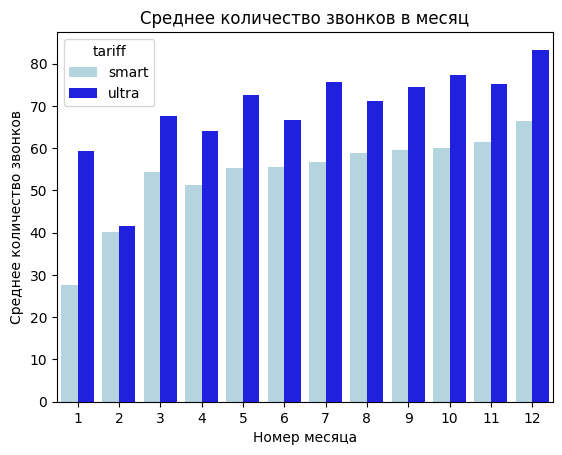

In [88]:
# Визуализируем распределение среднего количества звонков в месяц по видам тарифов
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
ax.set_title('Среднее количество звонков в месяц')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

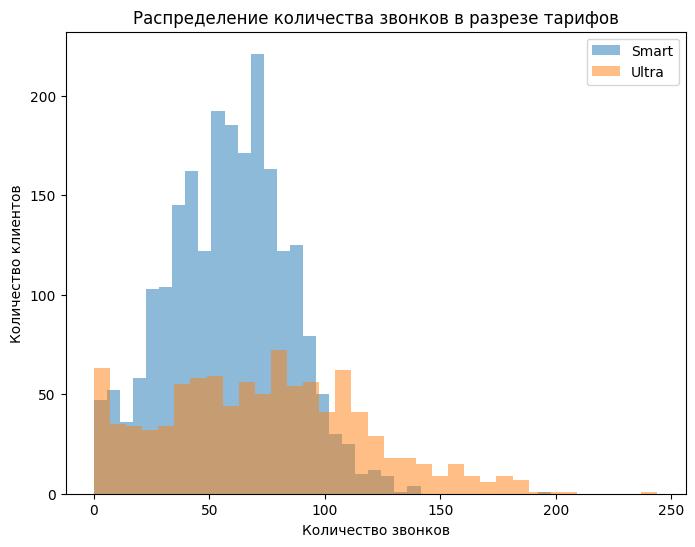

In [66]:
# Визуализируем распределение количества звонков в месяц в разрезе тарифов
plt.figure(figsize=(8,6))
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.title('Распределение количества звонков в разрезе тарифов')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

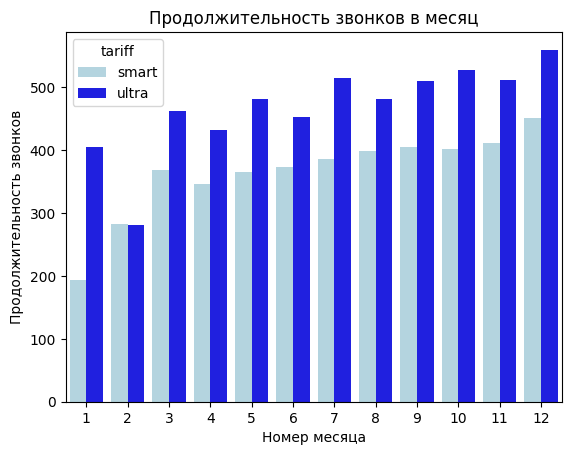

In [89]:
# Визуализируем распределение средней продолжительности звонков в месяц по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
ax.set_title('Продолжительность звонков в месяц')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность звонков');

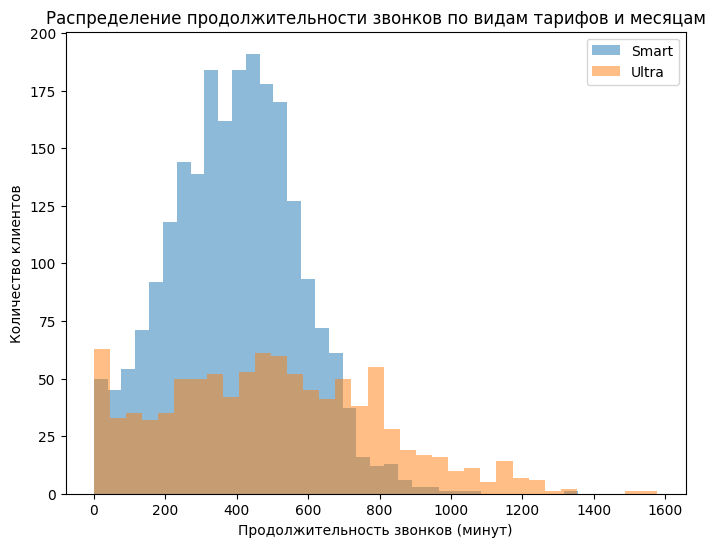

In [90]:
# Визуализируем распределение длительности звонков в разрезе тарифов
plt.figure(figsize=(8,6))
user_behavior.groupby('tariff')['minutes'].plot(kind='hist', bins=35, alpha=0.5)
plt.title('Распределение продолжительности звонков по видам тарифов и месяцам')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Продолжительность звонков (минут)')
plt.ylabel('Количество клиентов')
plt.show()

**Больше всего звонков пользователи делают в конце года в декабре**, меньше всего в январе у тарифа Смарт и в феврале у тарифа Ультра.  
**Среднее количество и длительность разговоров у абонентов тарифа Ультра больше, чем у абонентов тарифа Смарт**. Рост средней длительности разговоров у абонентов тарифа Смарт равномерный в течение года. Пользователи тарифа Ультра не проявляют подобной линейной стабильности. Также среди пользователей Ультра больше любителей длинных разговоров, более 1000 минут в месяц.

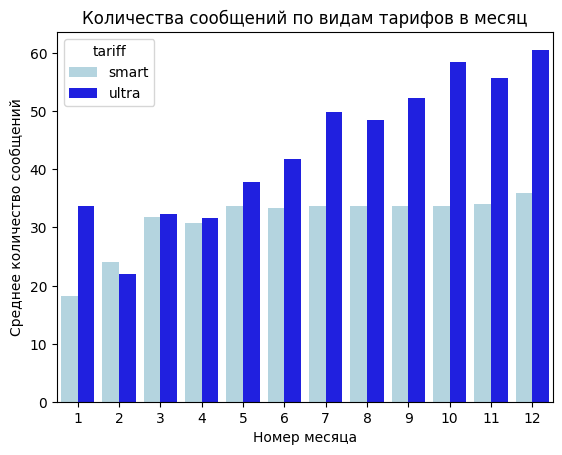

In [91]:
# Распределение среднего количества сообщений по видам тарифов и месяцам
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
ax.set_title('Количества сообщений по видам тарифов в месяц')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

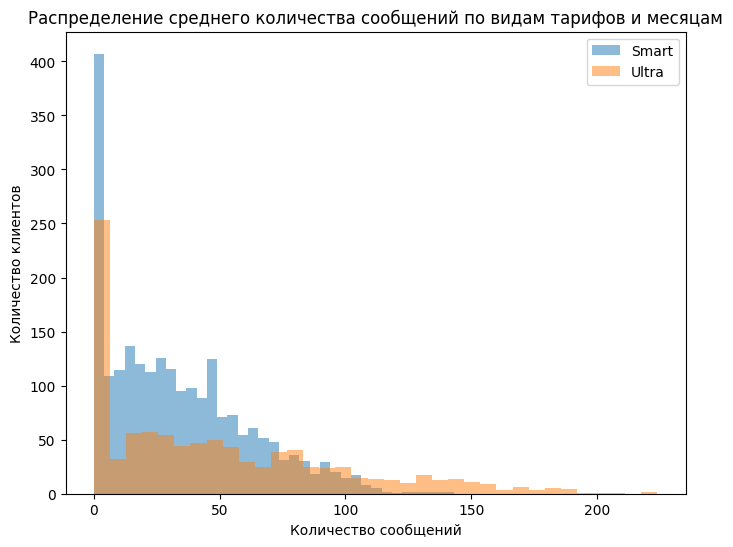

In [92]:
# Визуализируем распределение количества сообщений в разрезе тарифов
plt.figure(figsize=(8,6))
user_behavior.groupby('tariff')['messages'].plot(kind='hist', bins=35, alpha=0.5)
plt.title('Распределение среднего количества сообщений по видам тарифов и месяцам')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.show()

**В среднем количество сообщений пользователи тарифа Ультра отправляют больше**. Количество отправленных сообщений у пользоваетелей тарифа Ультра заметно выросло к концу года, а пользователи Смарта с марта по декабрь отправили стабильно примерно одинаковое число СМС. Однако, как и в ситуации со звонками, в тарифе Ультра есть пользователи, отправляющие более 120 сообщений в месяц.

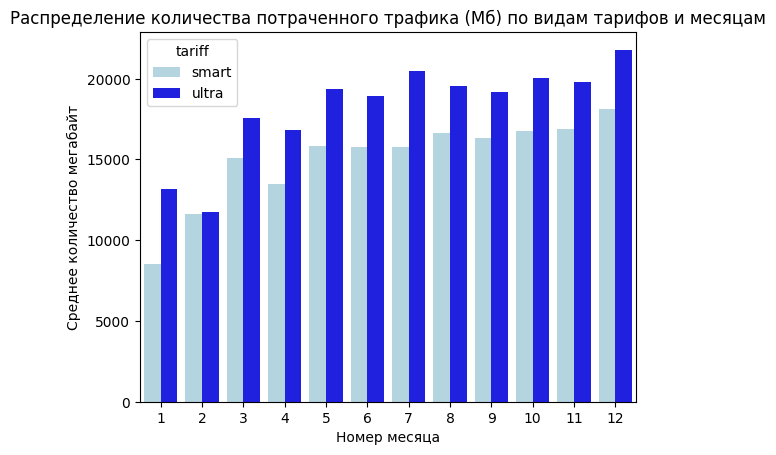

In [74]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

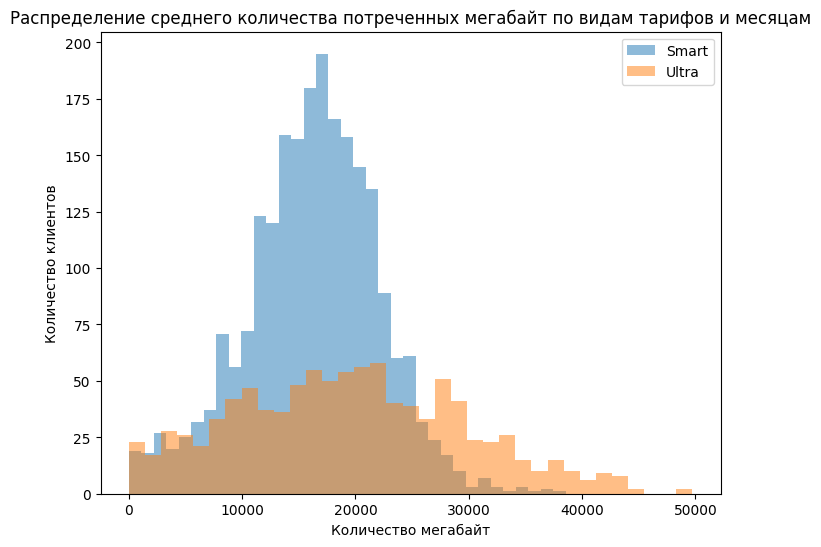

In [76]:
# Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra
plt.figure(figsize=(8,6))
user_behavior.groupby('tariff')['mb_used'].plot(kind='hist', bins=35, alpha=0.5)
plt.title('Распределение среднего количества потреченных мегабайт по видам тарифов и месяцам')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество клиентов')
plt.show()

В среднем **пользователи тарифа Ультра используют больше мегабайт интернета**. Меньше всего пользователи использовали интернет в январе, феврале, больше всего в декабре. Чаще всего абоненты тарифа Смарт тратят примерно 15-17 Гб, а абоненты тарифного плана Ультра - 22-23 ГБ

### Расчет выручки по тарифам

Итак, теперь у нас есть таблица, сводящая все данные об активности пользователей по месяцам. Теперь мы можем проанализировать насколько эффективно они используют тарифы, сравнив фактическую активность с пакетом тарифов.

In [28]:
# Считаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [29]:
# Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [30]:
# Считаем выручку за минуты разговора, сообщения и интернет
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [31]:
# Считаем помесячную выручку с каждого пользователя
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,150.06,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,158.90,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14003.64,318.80,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14055.93,389.87,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14568.91,440.14,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0


In [32]:
# Считаем дополнительную выручку с каждого пользователя за выход за тарифный пакет 
user_behavior['add_cost_sum'] = \
    user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [33]:
# Просуммируем доход за тарифную плату и дополнительные доходы (за выход из тарифного пакета)
# в т.ч. в разрезе минут / сообщений / интернета
tariff_behavior = user_behavior.groupby('tariff').agg(
    {'total_cost':'sum',
     'rub_monthly_fee': 'sum',
     'add_cost_sum':'sum',
     'cost_minutes':'sum',
     'cost_messages':'sum',
     'cost_gb':'sum'}).reset_index(drop=True).T
tariff_behavior = tariff_behavior.rename(columns = {0:'smart', 1:'ultra'})
tariff_behavior

,smart,ultra
total_cost,2802209.02,2039100.0
rub_monthly_fee,1225950.00,1920750.0
add_cost_sum,1576259.02,118350.0
cost_minutes,205075.02,0.0
cost_messages,38784.00,0.0
cost_gb,1332400.00,118350.0


<Figure size 600x400 with 0 Axes>

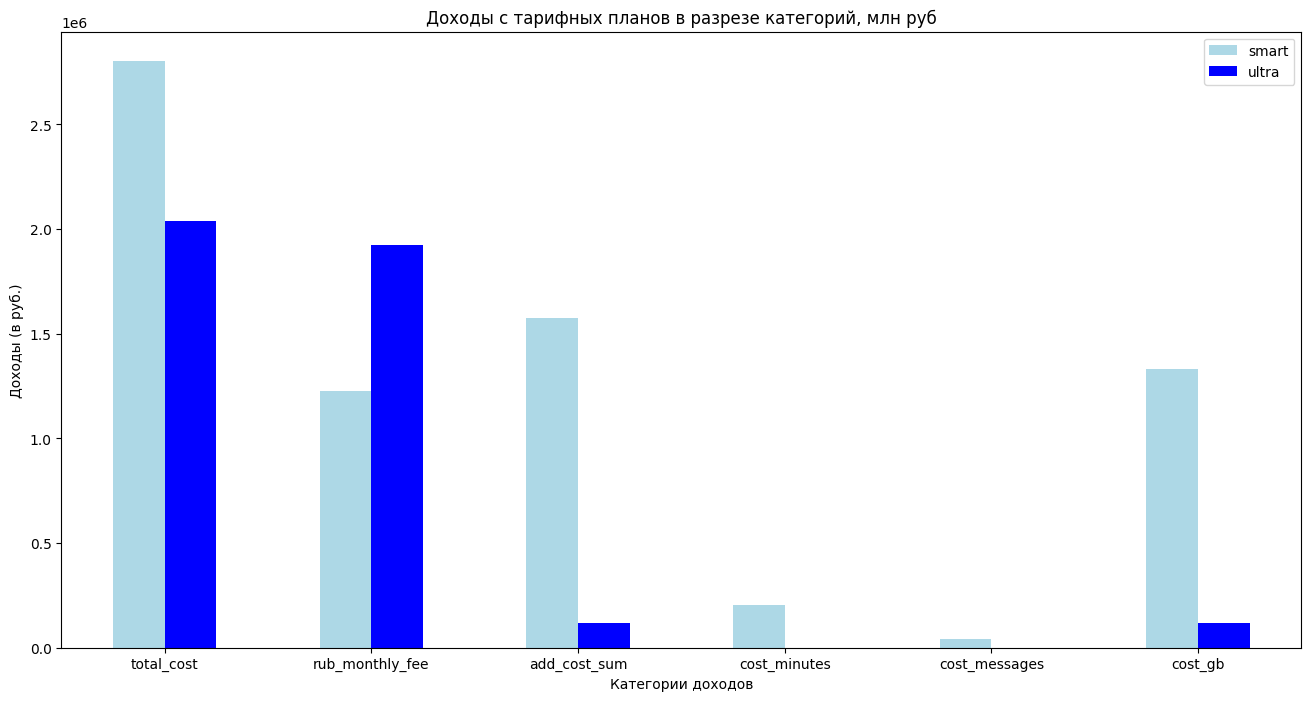

In [34]:
# Отобразим на графике разницу доходов с тарифных планов
plt.figure(figsize=(6,4))
tariff_behavior.plot(kind='bar', figsize=(16,8), color=['lightblue', 'blue'])
plt.title('Доходы с тарифных планов в разрезе категорий, млн руб')
plt.xticks(rotation=0)
plt.xlabel('Категории доходов')
plt.ylabel('Доходы (в руб.)')
plt.show()

Text(0, 0.5, 'Средние затраты одного пользователя на мобильную связь (руб.)')

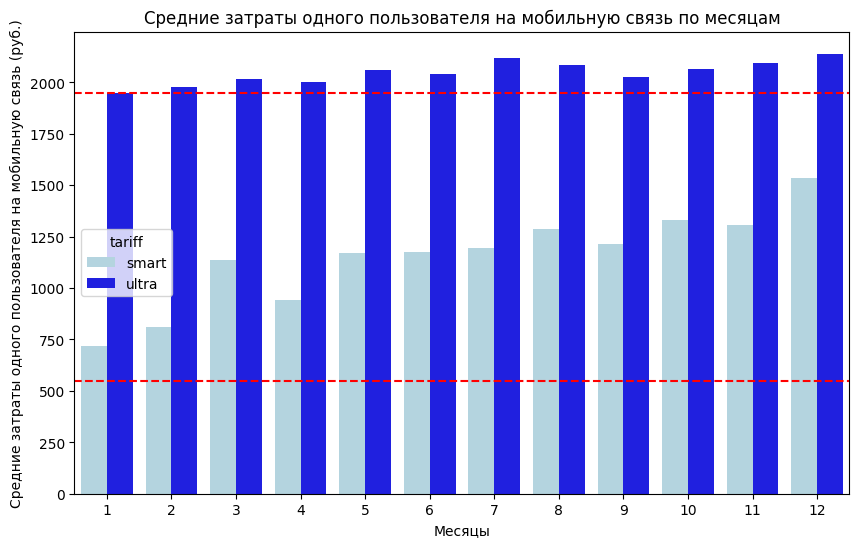

In [93]:
# Визуализируем сколько рублей в месяц в среднем пользователь каждого из тарифов тратит на мобильную связь 
total_cost = user_behavior.groupby(['tariff', 'month'])['total_cost'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Средние затраты одного пользователя на мобильную связь по месяцам')
sns.barplot(data=total_cost, x='month', y='total_cost', hue='tariff', palette=['lightblue', 'blue'])
# Проведем красные линии, означающие цены за тарифную плату (550 руб у Смарт и 1950 руб у Ультра)
plt.axhline(y=550, color='red', linestyle='--')
plt.axhline(y=1950, color='red', linestyle='--')
plt.xlabel('Месяцы')
plt.ylabel('Средние затраты одного пользователя на мобильную связь (руб.)')

Text(0, 0.5, 'Средние переплаты одного пользователя на мобильную связь (руб.)')

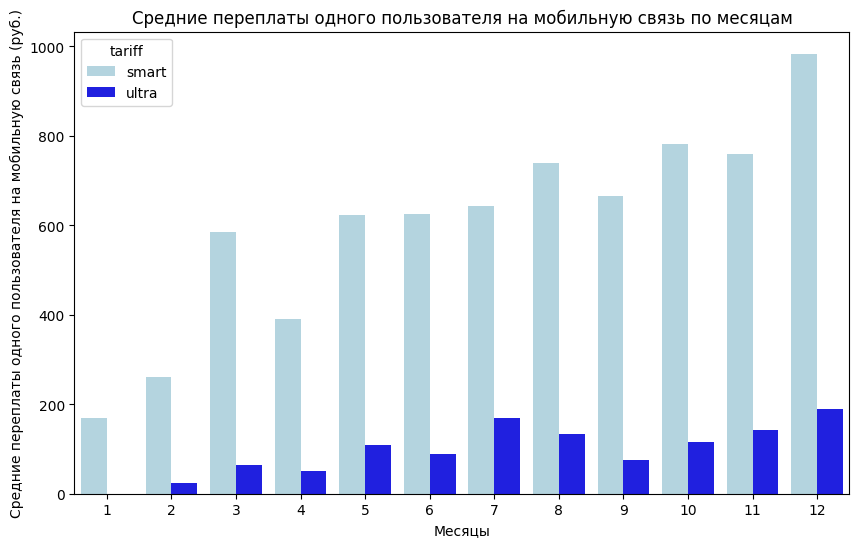

In [86]:
# Визуализируем сколько рублей в месяц в среднем пользователь каждого из тарифов переплачивает 
# за выход из пакета на мобильную связь 
add_cost_sum = user_behavior.groupby(['tariff', 'month'])['add_cost_sum'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.title('Средние переплаты одного пользователя на мобильную связь по месяцам')
sns.barplot(data=add_cost_sum, x='month', y='add_cost_sum', hue='tariff', palette=['lightblue', 'blue'])
plt.xlabel('Месяцы')
plt.ylabel('Средние переплаты одного пользователя на мобильную связь (руб.)')

**Тариф Смарт за весь временной период принес компании больше выручки, чем тариф Ультра** (2,8 млн руб против 2 млн руб). Пользователи Смарта переплачивают больше за выход за пределы пакета, чем тратят на ежемесячную тарифную плату. Выход за пакет обходится им в 1,5 млн рублей, а пользователям тарифа Ультра всего в 118 тыс рублей. При этом, в большинстве случаев пользователям Смарт в тарифном плане не хватает пакета Интернета.

Переплаты пользователей Смарта имеют растущий тренд - в январе они вышли за пакет примерно на 180 руб, а в конце года уже почти на 1000 руб.

In [114]:
# Изучим данные по 10 городам, которые приносят больше всего прибыли компании
total_cost_city = user_behavior.groupby(['tariff', 'city'])['total_cost'].mean().reset_index()
total_cost_city_15 = total_cost_city.sort_values(by='total_cost', ascending=False).head(15)
total_cost_city_15

,tariff,city,total_cost
93,ultra,Махачкала,3225.000000
77,ultra,Владимир,3225.000000
110,ultra,Саранск,2833.333333
122,ultra,Ульяновск,2625.000000
106,ultra,Ростов-на-Дону,2512.500000
78,ultra,Волгоград,2335.714286
90,ultra,Красноярск,2325.000000
80,ultra,Воронеж,2317.741935
114,ultra,Сочи,2300.000000
38,smart,Оренбург,2253.645000


**Больше всего денег на мобильную связь тратят жители Махачкалы и Владимира на тарифе Ультра (3225 руб)**. В основном в ТОП-15 такие результаты принес тариф Ультра, и только в двух городах Оренбург и Воронеж прибыль с тарифа Смарт (2253,6 руб и 2129,4 руб соответсвенно).

## Проверка гипотезы

Гипотеза: **Пользователи из Москвы приносят больше выручки, чем пользователи из других городов**

H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы

H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы

alpha = 0.05

In [47]:
results = st.ttest_ind((user_behavior[user_behavior['city'] =='Москва']['total_cost']),
                       (user_behavior[user_behavior['city'] !='Москва']['total_cost']),
                       equal_var = False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.46411900164961384
Не получилось отвергнуть нулевую гипотезу


Пользователи из Москвы не приносят выручки больше, чем пользователи из других городов.

## Выводы и рекомендации

1) **В ходе предобработки** заменили тип данных с датами, удалили лишние столбцы и добавили столбцы с номерами месяцев. Дубликатов и заменяющих пустоты значений не обнаружено. Данные чистые.


2) **Исследовательский анализ данных**:

2.1. **Медианная длительность звонков равна 7.74 минуты** (без учета нулевых значений).

2.2. **Тариф Смарт более чем в два раза популярнее, чем тариф Ультра** (351 чел и 149 чел соответсвенно). Возможно  это связано со стоимостью - тариф Смарт всего всего 550 рублей, когда как тариф Ультра стоит 1950 рублей.

2.3. **Расторгли договор 7.6% клиентов**. Расторжение договоров происходило с августа по декабрь, но _возможно данные неполные_. Темпы оттока пользователей увеличиваются к концу года. **Пользователи тарифа Ультра чаще отказываются от услуг компании** (10,07% оттока), чем пользователи Смарт (6,55% оттока).

2.4. **Больше всего звонков делают в декабре**, меньше всего в январе у тарифа Смарт и в феврале у тарифа Ультра.  
**Среднее количество и длительность разговоров у тарифа Ультра больше, чем у Смарт**. 

2.5. **Пользователи тарифа Ультра отправляют больше сообщений**.Высокая актвиность в декабре, меньше всего в январе у тарифа Смарт и в феврале у тарифа Ультра. 

2.6. В среднем **пользователи тарифа Ультра используют больше мегабайт интернета**. Меньше всего пользователи использовали интернет в январе, феврале, больше всего в декабре. Чаще всего абоненты тарифа Смарт тратят примерно 15-17 Гб, а абоненты тарифного плана Ультра - 22-23 ГБ

3) **Расчет выручки**:

**Тариф Смарт за весь временной период принес компании больше выручки, чем тариф Ультра** (2,8 млн руб против 2 млн руб). Пользователи Смарта переплачивают больше за выход за пределы пакета, чем тратят на ежемесячную тарифную плату. Выход за пакет обходится им в 1,5 млн рублей, а пользователям тарифа Ультра всего в 118 тыс рублей. При этом, в большинстве случаев пользователям Смарт в тарифном плане не хватает пакета Интернета.

**Переплаты пользователей Смарта имеют растущий тренд** - в январе они вышли за пакет примерно на 180 руб, а в конце года уже почти на 1000 руб.

**Больше всего денег на мобильную связь тратят жители Махачкалы и Владимира на тарифе Ультра (3225 руб)**. В основном в ТОП-15 такие результаты принес тариф Ультра, и только в двух городах Оренбург и Воронеж прибыль с тарифа Смарт (2253,6 руб и 2129,4 руб соответсвенно).

4) Гипотеза **"Пользователи из Москвы приносят больше выручки, чем пользователи из других городов"** отвергнута.